In [1]:
import pandas as pd
from IPython.display import display as d

import os

In [2]:
df = pd.read_csv("all_src_features.csv")
columns = ["cpbd", "si", "nima_a", "mos", "tone", "saturation", "blur_stength", "color_fulness", "nima_q"]
# mix max scaling of all values
#for col in columns:
#    df[col] =  (df[col] - df[col].min() ) / (df[col].max() - df[col].min())
df["mos"] = (df["mos"] -1) / 4
df["nima_a"] = (df["nima_a"] -1 ) / 6
df["saturation"] = df["saturation"] / 100
df["color_fulness"] = df["color_fulness"] / 256
df["nima_q"] = (df["nima_q"] - 1) / 6 
df["db"] = df["image"].apply(lambda x: os.path.dirname(x).split("/")[0])
df  = df[df["db"] == "own"]
d(df)

,image,nima_q,nima_a,blur,blur_stength,ci,color_fulness,contrast,count_1,count_2,...,si,simplicity,std,std_depth,std_segmentation,tone,unisalconnected_components,unisalmean_saliency,unisalstd_saliency,db
190,own/medium/IMG_4480.jpg,0.768574,0.596582,12644.471241,0.319185,0.605475,0.500511,61.609247,3,3,...,0.116433,8.526303e-01,1.293709,18907.528653,2.861129,0.118789,7,0.009399,0.096494,own
191,own/medium/IMG_7057.jpg,0.749194,0.631617,47366.572960,0.320760,0.398677,0.627504,83.373890,4,6,...,0.310100,9.305000e-03,1.048104,18385.079509,2.289161,0.711098,48,0.047714,0.213161,own
192,own/medium/IMG_6222.jpg,0.521484,0.681993,5668.207579,0.567411,0.567167,0.099721,83.655921,9,3,...,0.131568,5.420656e-01,1.279204,18092.405309,2.642268,0.680880,98,0.105009,0.306565,own
193,own/medium/IMG_20190513_210752882.jpg,0.694417,0.650677,43057.503082,0.274661,0.460663,0.432634,83.189419,5,7,...,0.261402,9.891281e-01,1.188013,10938.766208,0.551635,0.628970,2,0.010930,0.103975,own
194,own/medium/IMG_20190604_212833103.jpg,0.690743,0.571221,4239.577514,0.425236,0.411411,0.542827,84.101410,10,10,...,0.107744,1.091475e-07,0.951388,18487.789996,5.108561,0.388508,75,0.084913,0.278753,own
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,own/medium/IMG_5150.jpg,0.681836,0.687386,32583.059222,0.374024,0.401741,0.603408,88.034773,7,6,...,0.281535,1.450310e-10,0.858395,10975.772204,3.331195,0.579222,37,0.038460,0.192304,own
322,own/medium/IMG_1665.jpg,0.734636,0.729200,3038.307008,0.419155,0.560689,0.152918,85.979742,1,3,...,0.094129,2.172117e-06,1.127494,12123.407646,3.710115,0.238750,13,0.087577,0.282679,own
323,own/medium/IMG_20170907_182814017.jpg,0.613021,0.790180,185404.639933,0.234293,0.424671,0.651773,89.684641,3,6,...,0.456003,6.132327e-01,0.982052,16309.083354,0.522589,0.899178,74,0.168429,0.374246,own
324,own/medium/IMG_4558.jpg,0.328434,0.640140,15390.592852,0.431080,0.355656,0.601271,85.570431,2,8,...,0.200051,8.945996e-01,0.917208,20658.942631,1.192423,0.448907,41,0.033226,0.179225,own


In [3]:
df.columns

Index(['image', 'nima_q', 'nima_a', 'blur', 'blur_stength', 'ci',
       'color_fulness', 'contrast', 'count_1', 'count_2', 'count_3', 'count_4',
       'count_5', 'cpbd', 'deepgaze_connected_components',
       'deepgaze_mean_saliency', 'deepgaze_std_saliency', 'dominant_color',
       'fft', 'filename', 'mean_depth', 'mean_dominant_color',
       'mean_segmentation', 'mos', 'neg', 'neu', 'niqe', 'noise',
       'num_ratings', 'number_segmentation', 'pos', 'rule_of_thirds',
       'saturation', 'si', 'simplicity', 'std', 'std_depth',
       'std_segmentation', 'tone', 'unisalconnected_components',
       'unisalmean_saliency', 'unisalstd_saliency', 'db'],
      dtype='object')

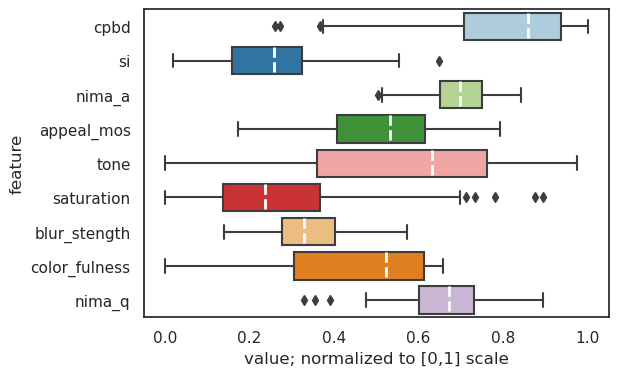

In [72]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)}, style="white")

dd = pd.DataFrame()

for col in columns:
    dd = pd.concat([
        dd, pd.DataFrame({
            "image": df["image"],
            "value": df[col],
            "feature": col if col != "mos" else "appeal_mos"
        })], ignore_index=True
    )

ax = sns.boxplot(
    x="value", 
    y="feature", 
    data=dd, 
    medianprops={"color": "white", "lw":2, "linestyle":"--"}, 
    palette=sns.color_palette("Paired")
)
ax.set_xlabel("value; normalized to [0,1] scale") 
ax.get_figure().savefig("features.pdf", bbox_inches='tight')